# Problem Statement

We'll create a model that predicts crop yeilds for apples and oranges (target variables) by looking at the average temperature, rainfall and humidity (input variables or features) in a region. Here's the training data

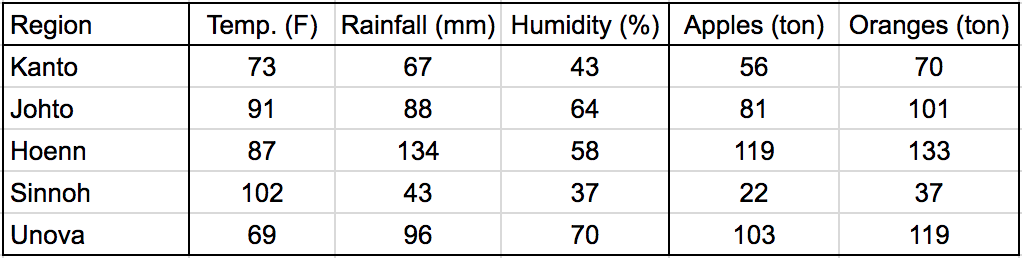

In a linear regression model, each target variable is estimated to be a weighted sum of the input variables, offset by some constant, known as a bias :
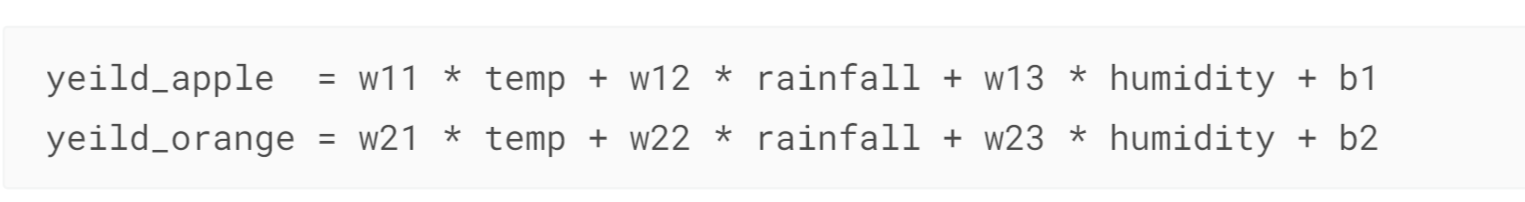

Our objective: Find a suitable set of weights and biases using the training data, to make accurate predictions.

# Data Representation :

In [1]:
import numpy as np

In [2]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [3]:
# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

In [4]:
print (inputs)
print (targets)

[[ 73.  67.  43.]
 [ 91.  88.  64.]
 [ 87. 134.  58.]
 [102.  43.  37.]
 [ 69.  96.  70.]]
[[ 56.  70.]
 [ 81. 101.]
 [119. 133.]
 [ 22.  37.]
 [103. 119.]]


Before we build a model, we need to convert inputs and targets to PyTorch tensors.

In [5]:
import torch

In [6]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [7]:
# Weights and biases
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[ 1.2558, -0.9041, -0.2605],
        [ 0.2164,  0.3909,  1.3567]], requires_grad=True)
tensor([-1.2025, -0.6298], requires_grad=True)


# Linear regression model

In [8]:
# Define the model
def model(x):
    return x @ w.t() + b
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[ 18.6919,  99.6992],
        [ 16.8385, 140.2950],
        [-28.2116, 149.2717],
        [ 78.3727,  88.4528],
        [-19.5856, 146.8015]], grad_fn=<AddBackward0>)


In [9]:
# Compare with targets
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


Because we've started with random weights and biases, the model does not a very good job of predicting the target varaibles.

Loss Function
We can compare the predictions with the actual targets, using the following method:
* Calculate the difference between the two matrices (preds and targets).
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* The result is a single number, known as the mean squared error (MSE).

In [10]:
# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()
# Compute loss
loss = mse(preds, targets)
print(loss)

tensor(5149.6182, grad_fn=<DivBackward0>)


# Compute Gradients

In [11]:
# Compute gradients
loss.backward()
# Gradients for weights
print(w)
print(w.grad)
# Gradients for bias
print(b)
print(b.grad)

tensor([[ 1.2558, -0.9041, -0.2605],
        [ 0.2164,  0.3909,  1.3567]], requires_grad=True)
tensor([[-4815.5967, -7443.2793, -4148.8115],
        [ 2865.2034,  2501.9258,  1717.1128]])
tensor([-1.2025, -0.6298], requires_grad=True)
tensor([-62.9788,  32.9040])


A key insight from calculus is that the gradient indicates the rate of change of the loss, or the slope of the loss function w.r.t. the weights and biases.
If a gradient element is postive,
* increasing the element's value slightly will increase the loss.
* decreasing the element's value slightly will decrease the loss

If a gradient element is negative,
* increasing the element's value slightly will decrease the loss.
* decreasing the element's value slightly will increase the loss.

Finally, we'll reset the gradients to zero before moving forward, because PyTorch accumulates gradients.

In [12]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


Adjust weights and biases using gradient descent
We'll reduce the loss and improve our model using the gradient descent algorithm, which has the following steps:

* Generate predictions
* Calculate the loss
* Compute gradients w.r.t the weights and biases
* Adjust the weights by subtracting a small quantity proportional to the gradient
* Reset the gradients to zero

In [13]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[ 18.6919,  99.6992],
        [ 16.8385, 140.2950],
        [-28.2116, 149.2717],
        [ 78.3727,  88.4528],
        [-19.5856, 146.8015]], grad_fn=<AddBackward0>)


In [14]:
# Calculate the loss
loss = mse(preds, targets)
print(loss)

tensor(5149.6182, grad_fn=<DivBackward0>)


In [15]:
# Compute gradients
loss.backward()

In [16]:
# Adjust weights & reset gradients
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [17]:
print(w)

tensor([[ 1.3040, -0.8297, -0.2190],
        [ 0.1878,  0.3659,  1.3395]], requires_grad=True)


With the new weights and biases, the model should have a lower loss.

In [18]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(4116.5039, grad_fn=<DivBackward0>)


# Train for multiple epochs



To reduce the loss further, we repeat the process of adjusting the weights and biases using the gradients multiple times. Each iteration is called an epoch.

In [19]:
# Train for 100 epochs
for i in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [20]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(585.3580, grad_fn=<DivBackward0>)


In [21]:
# Print predictions
preds

tensor([[ 67.6008,  72.4377],
        [ 86.4940, 105.4086],
        [ 92.1621, 118.7576],
        [ 82.6276,  50.3357],
        [ 73.2252, 119.4830]], grad_fn=<AddBackward0>)

In [22]:
# Print targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

# Linear Regression Model using PyTorch built-ins

Let's re-implement the same model using some built-in functions and classes from PyTorch.

In [23]:
# Imports
import torch.nn as nn

In [24]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32')
# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], [22, 37], [103, 119], 
                    [56, 70], [81, 101], [119, 133], [22, 37], [103, 119], 
                    [56, 70], [81, 101], [119, 133], [22, 37], [103, 119]], dtype='float32')

In [25]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

Dataset and DataLoader

We'll create a TensorDataset, which allows access to rows from inputs and targets as tuples. We'll also create a DataLoader, to split the data into batches while training. It also provides other utilities like shuffling and sampling.

In [26]:
# Import tensor dataset & data loader
from torch.utils.data import TensorDataset, DataLoader
# Define dataset
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]
# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))

[tensor([[ 69.,  96.,  70.],
         [ 73.,  67.,  43.],
         [ 69.,  96.,  70.],
         [ 87., 134.,  58.],
         [ 91.,  88.,  64.]]),
 tensor([[103., 119.],
         [ 56.,  70.],
         [103., 119.],
         [119., 133.],
         [ 81., 101.]])]

nn.Linear

Instead of initializing the weights & biases manually, we can define the model using nn.Linear

In [27]:
# Define model
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.2723,  0.3424, -0.0524],
        [-0.5156,  0.3994,  0.3956]], requires_grad=True)
Parameter containing:
tensor([ 0.3534, -0.5108], requires_grad=True)


Optimizer

Instead of manually manipulating the weights & biases using gradients, we can use the optimizer optim.SGD.

In [28]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

Loss Function

Instead of defining a loss function manually, we can use the built-in loss function mse_loss.

In [29]:
# Import nn.functional
import torch.nn.functional as F

In [30]:
# Define loss function
loss_fn = F.mse_loss
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(6253.6616, grad_fn=<MseLossBackward>)


Train the model

We are ready to train the model now. We can define a utility function fit which trains the model for a given number of epochs.

In [31]:
# Define a utility function to train the model
def fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for xb,yb in train_dl:
            # Generate predictions
            pred = model(xb)
            loss = loss_fn(pred, yb)
            # Perform gradient descent
            loss.backward()
            opt.step()
            opt.zero_grad()
    print('Training loss: ', loss_fn(model(inputs), targets))

In [32]:
# Train the model for 100 epochs
fit(100, model, loss_fn, opt)

Training loss:  tensor(11.3861, grad_fn=<MseLossBackward>)


In [33]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 58.1947,  70.6026],
        [ 80.0743,  99.4671],
        [122.4607, 135.5182],
        [ 25.9815,  38.8373],
        [ 95.3796, 115.8602],
        [ 58.1947,  70.6026],
        [ 80.0743,  99.4671],
        [122.4607, 135.5182],
        [ 25.9815,  38.8373],
        [ 95.3796, 115.8602],
        [ 58.1947,  70.6026],
        [ 80.0743,  99.4671],
        [122.4607, 135.5182],
        [ 25.9815,  38.8373],
        [ 95.3796, 115.8602]], grad_fn=<AddmmBackward>)

In [34]:
# Compare with targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

# Feedfoward Neural Network

In [35]:
class SimpleNet(nn.Module):
    # Initialize the layers
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(3, 3)
        self.act1 = nn.ReLU() # Activation function
        self.linear2 = nn.Linear(3, 2)
    
    # Perform the computation
    def forward(self, x):
        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        return x

Now we can define the model, optimizer and loss function exactly as before.

In [36]:
model = SimpleNet()
opt = torch.optim.SGD(model.parameters(), 1e-5)
loss_fn = F.mse_loss

Finally, we can apply gradient descent to train the model using the same fit function defined earlier for linear regression.

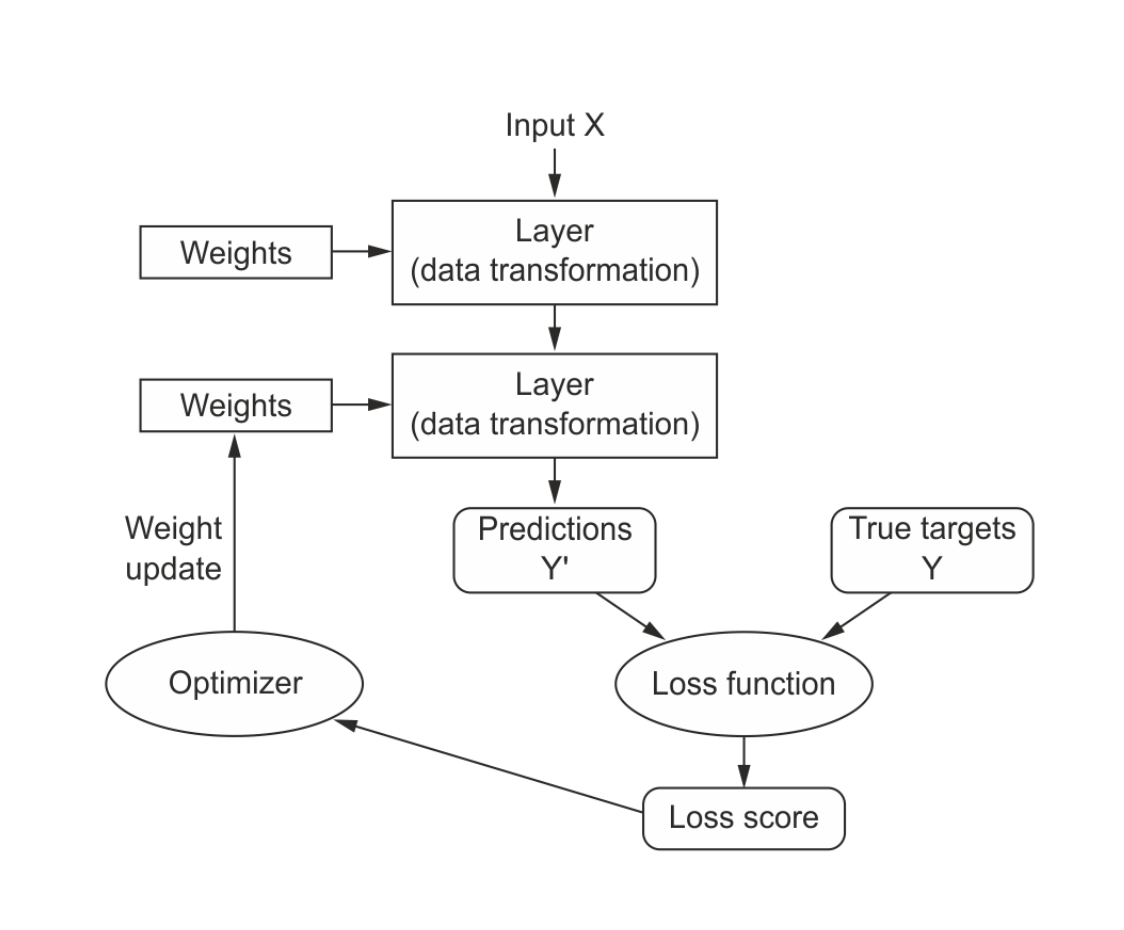

In [37]:
fit(100, model, loss_fn, opt)

Training loss:  tensor(46.9081, grad_fn=<MseLossBackward>)


# More Code

In [38]:

import torch
from torch.autograd import Variable
 
x_data = Variable(torch.Tensor([[1.0], [2.0], [3.0]]))
y_data = Variable(torch.Tensor([[2.0], [4.0], [6.0]]))
 
 
class LinearRegressionModel(torch.nn.Module):
 
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and one out
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
 
# our model
our_model = LinearRegressionModel()
 
criterion = torch.nn.MSELoss(size_average = False)
optimizer = torch.optim.SGD(our_model.parameters(), lr = 0.01)
 
for epoch in range(500):
 
    # Forward pass: Compute predicted y by passing
    # x to the model
    pred_y = our_model(x_data)
 
    # Compute and print loss
    loss = criterion(pred_y, y_data)
 
    # Zero gradients, perform a backward pass,
    # and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))
 
new_var = Variable(torch.Tensor([[4.0]]))
pred_y = our_model(new_var)
print("predict (after training)", 4, our_model(new_var).item())

epoch 0, loss 78.45368957519531
epoch 1, loss 34.942291259765625
epoch 2, loss 15.57201862335205
epoch 3, loss 6.94868278503418
epoch 4, loss 3.1095826625823975
epoch 5, loss 1.4002883434295654
epoch 6, loss 0.6391305923461914
epoch 7, loss 0.30005794763565063
epoch 8, loss 0.148889422416687
epoch 9, loss 0.08137335628271103
epoch 10, loss 0.05110039561986923
epoch 11, loss 0.03740987554192543
epoch 12, loss 0.03110460937023163
epoch 13, loss 0.0280899815261364
epoch 14, loss 0.02654324099421501
epoch 15, loss 0.025652937591075897
epoch 16, loss 0.02505774050951004
epoch 17, loss 0.024596795439720154
epoch 18, loss 0.02419832907617092
epoch 19, loss 0.023830611258745193
epoch 20, loss 0.023479195311665535
epoch 21, loss 0.023137887939810753
epoch 22, loss 0.02280350774526596
epoch 23, loss 0.022475026547908783
epoch 24, loss 0.022151686251163483
epoch 25, loss 0.02183314599096775
epoch 26, loss 0.021519282832741737
epoch 27, loss 0.021210070699453354
epoch 28, loss 0.020905133336782455

C:\Users\dell\anaconda3\envs\envpytorch\lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
